Deephack: Análise de Dados ODS 6 - TCESP
====================================

<div style="text-align: right">
    Julia Martinelli Tolentino <br>
    Vinicius Agustin Tapia Resende
    </div>

Sumário
=======

1. [Introdução](#introdução)<br>
 1.1.[Apresentação](#apresentação)<br>
2. [Metodologia](#metodologia)<br>
 2.1[SNIS](#snsi)<br>
 2.2[IEGM/TCESP](#iegm)<br>
 2.3[Indicadores utilizados](#indicadores)<br>
  &nbsp;&nbsp;a.[SNSI](#ind_snsi)<br>
  &nbsp;&nbsp;b.[IEGM/TCESP](#ind_iegm)<br>
 2.4[Observações sobre as bases de dados](#obs)<br>
3. [Análise de Dados](#análise)<br>
 3.1.[Agrupamento](#agrupamento)<br>
   &nbsp;&nbsp;a. [Índices de Agrupamento](#ind_agrup)<br>
 3.2.[Bibliotecas e Dados](#biblioteca)<br>
 3.3.[Funções](#função)<br>
 3.4.[Agrupamento Geral](#agrup_geral)<br>
 3.5.[Análises Individuais](#análise_indiv)<br>
   &nbsp;&nbsp;a.[Agrupamento: IN055 e IN056 - Ano 2017](#in055_in056)<br>
   &nbsp;&nbsp;b.[Agrupamento: SNSI1 e SNSI2 - Ano 2017](#snsi1_snsi2)<br>
   &nbsp;&nbsp;c.[Correlação: Planejamento](#plan)<br>
   &nbsp;&nbsp;d.[Agrupamento: IN049 e SNSI4 - Ano 2017](#in049_snsi4)<br>
   &nbsp;&nbsp;e.[Agrupamento Índices de qualidade](#qd)<br>
4. [API](#api)<br>
5. [Bibliografia](#bibliografia)<br>

Introdução<a name="introdução"></a> 
=========

### Apresentação<a name="apresentação"></a> <br>
   <div style="text-align: justify"> 
&nbsp;&nbsp;Por meio do Deephack, proporcionado pela USP Codelab em parceria com a Tribunal de Contas do Estado de São Paulo, nós nos propusemos a fazer uma API com o objetivo de disponibilizar os dados municipais referente ao Objetivo de Desenvolvimento Sustentável 6 - Disponibilidade e gestão sustentável da água e saneamento para todas e todos. A API também disponibiliza uma interface para fácil criação de novas análises utilizando tanto o banco de dados fornecido pelo TCESP quanto o do Sistema Nacional de Informações sobre Saneamento. Dessa forma, o TCESP pode criar o *frontend* que desejar, seja ela volta para a formulação e implementação de Políticas Públicas ou para a fiscalização popular. Para tanto, utilizamos a base de dados IEGM/TCESP (índice de efetividade da gestão municipal) e a base de dados do Sistema Nacional de Informações sobre Saneamento (SNIS). <br>
&nbsp;&nbsp; Esse notebook, em complemento à API, busca analisar a fundo os dados apresentados, trazendo insights e outros aprendizados obtidos pela base do TCESP e SNIS. Portanto, o documento se dividirá entre a metodologia utilizada e a análise dos dados. Para a execução deste projeto foi utilizado a linguagem de programação Python, assim como diversas bibliotecas normalmente utilizadas para a área de ciência de dados (numpy, seaborn, pandas, scipy, scikit-learn, etc), como extra foi utilizado a biblioteca geopandas para criação de mapas coloridos através de variáveis de interesse, assim como flask para criação da API. 
    <br>
</div>

Metodologia <a name="metodologia"></a>
==========

### SNIS - Sistema Nacional de Informações sobre Saneamento <a name="snsi"></a>  <br>
   <div style="text-align: justify">
&nbsp;&nbsp; O <a href="http://snis.gov.br/institucional-snis" title="Sistema Nacional de Informações sobre Saneamento">SNIS</a> é uma base de dados federal, hoje sob a responsabilidade do Ministério de Desenvolvimento Regional, sobre a prestação de serviços de Água e Esgotos, de Resíduos Sólidos Urbanos e de Águas Pluviais Urbanas. É a base de dados mais completa sobre o assunto, o que nos permite utilizar uma série de indicadores quantitativos para a análise.
&nbsp;&nbsp;Vale ressaltar também que as informações obtidas pelo SNSI são informadas, voluntariamente, pelos prestadores dos respectivos serviços. A partir das informações, o SNIS produz seus próprios indicadores, dos quais iremos comentar mais adiante.<br>
&nbsp;&nbsp;Para selecionar as informações e indicadores relevantes, nos baseamos na metodologia utilizada pelo <a href="http://www.tratabrasil.org.br/institucional/quem-somos" title="Instituto Trata Brasil">Intituto Trata Brasil</a>, OSCIP composta por diversas empresas preocupadas com o avanço do saneamento básico e a preservação dos recursos hídricos. Todo ano o Instituto produz o <a href="http://www.tratabrasil.org.br/estudos/estudos-itb/itb/ranking-do-saneamento-2019" title="Ranking fo Saneamento 2019 (ano base 2017)"> Ranking do Saneamento Básico</a>  das 100 maiores cidades do Brasil, no qual analisam uma miriade de dados provenientes do SNIS. Apesar do objetivo desse trabalho não ser criar um ranking, utilizamos os novos índices criados pelo instituto para aprimorar a análise sem ranquear as cidades paulistas.<br>
&nbsp;&nbsp;Do banco de dados do SNIS, utilizaremos os indicadores abaixo. Adicionamos os indicadores IN075, IN076, IN079, IN080, IN084 e IN085 - que não são utilizados pelo Instituo Trata Brasil - pois eles fazem alusão à qualidade da água, questão central da meta 6.3 da ODS em questão. <br>
</div>



| Índice         | Definição    | Unidade      |
| :------------- | :----------: | :----------: |
| POP_TOT | População Total do Município No Ano De Referência (Fonte: IBGE)  | Habitantes |
| POP_URB | População Urbana Do Município Do Ano De Referência (Fonte: IBGE) | Habitantes |
| IN023   | Índice de atendimento urbano de água | Percentual |
| IN024   | Índice de atendimento urbano de esgoto referido aos municípios atendidos com água | Percentual |
| IN046   | Índice de Esgoto Tratado Referido à Água consumida | Percentual |
| IN049   | Índice de Perdas na Distribuição | Percentual |
| IN055   | Índice de Atendimento Total de Água | Percentual |
| IN056   | Índice de Atendimento Total de Esgoto Referido aos Municípios Atendidos com Água | Percentual |
| IN075   | Incidência das análises de cloro residual fora do padrão | Percentual |
| IN076   | Incidência das análises de turbidez fora do padrão | Percentual |
| IN079   | Índice de conformidade da quantidade de amostras - cloro residual | Percentual|
| IN080   | Índice de conformidade da quantidade de amostras - turbidez | Percentual |
| IN084   | Incidência das análises de coliformes totais fora do padrão | Percentual |
| IN085   | Índice de conformidade da quantidade de amostras - coliformes totais | Percentual |

<div style="text-align: justify">
&nbsp;&nbsp;Da metodologia do Instituto Trata Brasil, utilizaremos os indicadores abaixo. A escolha destes se deu pela concordância com a ODS 6, na medida que: SNSI1 e SNSI2 dizem respeito à ampliação do acesso à água e esgoto, respectivamente, constribuindo para a análise do atingimento da meta 6.1 e 6.2; As SNSI4 e SNSI5, versam sobre eficiência,um dos pontos da meta 6.4; E, por fim, a SNSI3 permite vislumbrar qual esforço está sendo feito para o atingimento da ODS 6 como um todo. <br>
</div>


| Índice         | Definição    |
| :------------- | :----------: |
| SNSI1 | Novas Ligações de Água/Ligações Faltantes |
| SNSI2 | Novas Ligações de Esgoto/Ligações Faltantes |
| SNSI3 | Investimento sobre Arrecadação |
| SNSI4 | Perdas de Faturamento |
| SNSI5 | Evolução Perdas de Faturamento |

### IEGM/TCESP -  índice de efetividade da gestão municipal <a name="iegm"></a>  <br>
   <div style="text-align: justify">
&nbsp;&nbsp; O IEGM/TCESP é o banco de dados do TCESP, composto das respostas de cada prefeitura sobre o seu município em diferentes frentes. A disponibilização dos dados foi feita em conjunto com uma tabela definindo as perguntas relacionadas à cada ODS, o que auxiliou a nossa escolha das perguntas a serem trabalhadas. Entretanto, entendendo que todos os Objetivos de Desenvolvimento Sustentável trabalham de forma integrada e indivisível, selecionamos perguntas extra para complementar nosso trabalho. <br>
    &nbsp;&nbsp;As perguntas selecionadas, e as suas ODS correspondentes a seleção do TCESP são as abaixo:
</div>

| Índice         | Definição    | ODS    |
| :------------- | :----------: | :----------: |
| TCE01 | Existe registro do percentual da população do município abrangida pelo serviço de fornecimento de água tratada? |17.18 |
| TCE02 | Informe o percentual da população do município abrangida pelo serviço de fornecimento de água tratada: | 6.1;17.18 |
| TCE03 | Percentual da população municipal abrangida pela coleta de esgotamento sanitário: |  6.1;17.18  |
| TCE04 | Percentual da população municipal abrangida pelo tratamento do esgotamento sanitário: |  6.1;17.18  |
| TCE05 | O município possui seu Plano Municipal de Saneamento Básico instituído? | 16.10; 16.6; 16.7; 6 |
| TCE06 | Quais são os instrumentos normativos que tratam do Plano Municipal de Saneamento Básico? | 6 |
| TCE07 | Informe o ICTEM - Indicador de Coleta de Tratabilidade de Esgoto da População Urbana de Município da gestão atual: | Não informado |
| TCE08 | Informe o ICTEM - Indicador de Coleta de Tratabilidade de Esgoto da População Urbana de Município da gestão anterior: | Não informado |
| TCE09 | Os serviços de coleta e tratamento de esgoto são executados de forma direta pelo Município? | 6 |
| TCE10 | Cite a autarquia/empresa estatal/empresa contratada: | Não informado |
| TCE11 | Descreva os meios de realização dos serviços de coleta e tratamento de esgoto são realizados por meio de: | 6; 17.18 |
| TCE12 | Em quantos anos está prevista a prestação do serviço de coleta e tratamento de esgoto? | 17.18 |
| TCE13 | A prefeitura municipal estimula entre seus órgãos e entidades de sua responsabilidade projetos e/ou ações que promovam o uso racional de recursos naturais? | 12.2;12.7 |
| TCE14 | Existem ações e medidas de contingenciamento para os períodos de estiagem? | 6.4; 6.5; 15.6 |
| TCE15 |Descreva quais as ações e medidas são realizadas para o contingenciamento para os períodos de estiagem:  | 6.4; 6.5 |
| TCE16 | Existem ações e medidas de contingenciamento para provisão de água potável e de uso comum para a Rede Municipal de Ensino? | 6.4, 6.5 |
| TCE17 | Descreva as ações e medidas realizadas de contingenciamento para a provisão de água potável e de uso comum para a rede municipal de ensino: | 6.4, 6.5 |
| TCE18 | Existem ações e medidas de contingenciamento para provisão de água potável e de uso comum para a rede municipal da Atenção Básica da Saúde? | 6.4, 6.5 |
| TCE19 | Descreva as ações e medidas realizadas de contingenciamento para a provisão de água potável e de uso comum para a rede municipal de Atenção Básica: | 6.4, 6.5 |
| TCE20 | Há um plano emergencial com ações para fornecimento de água potável à população em caso de sua escassez? | 6.4, 6.5 |
| TCE21 | Descreva o plano Plano Emergencial de Escassez de Água Potável: | 6.4, 6.5 |
| TCE22 | Os serviços de abastecimento e distribuição de água são executados de forma direta pelo município? | 6 |
| TCE23 | Cite a autarquia/empresa estatal/empresa contratada pelos serviços de abastecimento e distribuição de água: | Não informado |
| TCE24 | Descreva os meios de realização dos serviços de abastecimento e distribuição de água são realizados por meio de: | 6; 17.18 |
| TCE25 | Em quantos anos está prevista a prestação do serviço? | 17.18 |
| TCE26 | A prefeitura possui ou participa de algum programa ou ação que promovam a melhoria continua da qualidade ambiental no município? | 16.7; 12.2; 15  |
| TCE27 | Qual programa ou ação que promova a melhoria contínua da qualidade ambiental no município? | 16.7; 12.2; 15 |
| TCE28 | O município está habilitado junto ao CONSEMA para licenciar os empreendimentos de impacto local de conformidade com a Deliberação Normativa Consema 01/2014? | 17.16; 17.17; 6; 7; 13; 14; 15 |
| TCE29 | O município participa do programa Município VerdeAzul? | 17.16; 17.17; 6; 7; 13; 14; 15 |

## Indicadores utilizados<a name="indicadores"></a> 
### SNIS <a name="ind_snsi"></a> 
+ **IN023** - Índice de atendimento urbano de água: O percentual relativo da população urbana com atendimento de água.
<br><br>

$$\frac{\text{População urbana atendida com abastecimento de água}}{\text{População urbana residente do município com abastecimento de água}} \times 100$$
<br>

+ **IN024** - Índice de atendimento urbano de esgoto referido aos municípios atendidos com água: O percentual relativo da população urbana com atendimento de esgoto, de acordo com a população com acesso à água.
<br> <br>

  $$\frac{\text{População urbana atendida com esgotamento sanitário}}{\text{População urbana residente do(s) município(s) com abastecimento de água}} \times 100$$
<br>

+ **IN046** - Índice de esgoto tratado referido à água consumida: O percentual relativo do esgoto tratado da água consumida.<br> <br>

  $$\frac{\text{Volume de esgotos tratado + Volume de esgoto bruto exportado tratado nas instalações do importador}}{\text{Volume de água consumido - Volume de água tratada exportado}} \times 100$$
<br>

+ **IN049** - Índice de perdas na distribuição: O percentual de água perdida durante a distribuição, considerando o volume total de água (volume produzido somado ao importado) e quanto dela é consumida pela população total e pelo serviço prestado. Esse resultado, então, é dividido pelo volume total de água subtraído do volume usado pelo prestador. <br> <br>

  $$\frac{\text{Volume de água produzido + Volume de água tratada importado - Volume de água consumido - Volume de Serviço}}{\text{Volume de água produzido + Volume de água tratada importado - Volume de Serviço}}\times 100$$
<br>
<div style="text-align: justify"> 
&nbsp;&nbsp;Volume de Serviço = "Valor da soma dos volumes anuais de água usados para atividades operacionais e especiais, acrescido do volume de água recuperado. (...) Os volumes para atividades operacionais compreendem aqueles utilizados como insumo operacional para desinfecção de adutoras e redes, para testes hidráulicos de estanqueidade e para limpeza de reservatórios, de forma a assegurar o cumprimento das obrigações estatutárias do operador (particularmente aquelas relativas à qualidade da água). São volumes plenamente conhecidos do operador, que variam em função da natureza do evento e das características da parte do sistema envolvido. Já os volumes para atividades especiais são aqueles consumidos pelos prédios próprios do operador, os volumes transportados por caminhões-pipa, os consumidos pelo corpo de bombeiros, os abastecimentos realizados a título de suprimentos sociais, como para favelas e chafarizes, por exemplo, os usos para lavagem de ruas e rega de espaços verdes públicos, e os fornecimentos para obras públicas. " (BRASIL, 2019a, p.14) 
</div> <br>

+ **IN055** - Índice de Atendimento Total de Água:  O percentual relativo da população total com atendimento de água <br> <br>

  $$\frac{\text{População total atendida com abastecimento de água}}{\text{População total residente do município com abastecimento de água}} \times 100$$
<br>

+ **IN056** - Índice de Atendimento Total de Esgoto Referido aos Municípios Atendidos com Água: O percentual relativo da população total com atendimento de esgoto, de acordo com a população com acesso à água. <br> <br>

  $$\frac{\text{População total atendida com esgotamento sanitário}}{\text{População total residente do município com abastecimento de água}} \times 100$$
<br>

+ **IN075** - Incidência das análises de cloro residual fora do padrão: O percentual de amostras com cloro fora do padrão, da quantidade de amostras analisadas <br> <br>

  $$\frac{\text{Quantidade de amostras para cloro residual com resultados fora do padrão}}{\text{Quantidade de amostras para cloro residual (analisadas)}} \times 100$$
<br>

+ **IN076** - Incidência das análises de turbidez fora do padrão:  O percentual de amostras de turbidez fora do padrão, da quantidade de amostras analisadas <br> <br>

  $$\frac{\text{Quantidade de amostras para turbidez fora do padrão}}{\text{Quantidade de amostras para turbidez (analisadas)}} \times 100$$
<br>

+ **IN079** - Índice de conformidade da quantidade de amostras - cloro residual: Do total de amostras de cloro residual obrigatórias que deveriam ser analisadas pelo prestador de serviçosr, quantas foram de fato analisadas. <br> <br>

  $$\frac{\text{Quantidade de amostras para cloro residual (analisadas)}}{\text{Quantidade mínima de amostras para cloro residual (obrigatórias)}} \times 100$$
<br>

+ **IN080** - Índice de conformidade da quantidade de amostras - turbidez:  Do total de amostras de cloro residual obrigatórias que deveriam ser analisadas pelo prestador de serviços, quantas foram de fato analisadas. <br> <br>

  $$\frac{\text{Quantidade de amostras para turbidez (analisadas)}}{\text{Quantidade mínima de amostras para turbidez (obrigatórias)}} \times 100$$
<br>

+ **IN084** - Incidência das análises de coliformes totais fora do padrão:  O percentual de amostras de coliformes totais fora do padrão, da quantidade de amostras analisadas. <br> <br>

  $$\frac{\text{Quantidade de amostras para coliformes totais com resultados fora do padrão}}{\text{Quantidade de amostras para coliformes totais (analisadas)}} \times 100$$
<br>

+ **IN085** - Índice de conformidade da quantidade de amostras - coliformes totais: Do total de amostras de coliformes totais obrigatórias que deveriam ser analisadas pelo prestador de serviços, quantas foram de fato analisadas. <br> <br>

  $$\frac{\text{Quantidade de amostras para coliformes totais (analisadas)}}{\text{Quantidade mínima de amostras para coliformes totais (obrigatórias)}} \times 100$$
<br>


### Instituto Trata Brasil<a name="ind_iegm"></a> 
+ **SNSI1** - Novas Ligações de Água/Ligações Faltantes: Compara a quantidade de novas ligações de um ano para o seguinte. O parâmetro 100 é a convenção utilizado pelo Instituto Trata para designar a nota máxima que seria utilizada em seu ranking. <br><br>

$${\frac{{AG021}_{t} \text{-} {AG021}_{t-1}}
{\left({\dfrac{AG021_{t}}{\frac{IN055_{t}}{100}}}\right)\text{-} AG021_{t-i}}}$$ <br>

<div style="text-align: justify">
AG021 = Quantidade de ligações totais (ativas e inativas) de água à rede pública <br>
IN055 = Índice de Atendimento Total de Água<br>
t = ano corrente <br>
t-1 = ano anterior <br>
</div>

+ **SNSI2** - Novas Ligações de Esgoto/Ligações Faltantes:  Compara a quantidade de novas ligações de um ano para o seguinte. O parâmetro 98 é a convenção utilizado pelo Instituto Trata para designar a nota máxima que seria utilizada em seu ranking.<br><br>

$${\frac{{ES009}_{t} \text{-} {ES009}_{t-1}}
{\left({\dfrac{ES009_{t}}{\frac{IN056_{t}}{98}}}\right)\text{-} ES009_{t-i}}}$$<br>
<div style="text-align: justify">
ES009 = Quantidade de ligações totais (ativas e inativas) de esgotos à rede pública <br>
IN055 = Índice de Atendimento Total de Água<br>
t = ano corrente <br>
t-1 = ano anterior <br>
</div>

+ **SNSI3** - Investimento sobre Arrecadação: A quantidade de investimentos totais, feitos tanto pelo prestador de serviços quanto municipios e estado, em relação à arrecadação. Esse indicador leva em consideração os últimos 5 anos,"com intuito de atenuar os efeitos de variações inerentes ao ciclo de
investimentos dos prestadores"(INSTITUTO TRATA BRASIL, 2019, p.28). Valores anteriores corrigidos pelo índice IPCA para dezembro de 2017.  <br><br>

$${\frac{{\sum_{i=0}^5 \text{FN033}_{t-i} + \sum_{i=0}^5\text{FN048}_{t-i} + \sum_{i=0}^5\text{FN058}c_{t-i}}}{{\sum_{i=0}^5\text{FN006}_{t-i}}}}$$ <br>
<div style="text-align: justify">
FN033 = Investimentos totais realizados pelo prestador de serviços <br> 
FN048 = Investimentos totais realizados pelo município<br> 
FN058 = Investimentos totais realizados pelo estado<br>
FN006 = Arrecadação total <br>
t = ano atual 
   </div>
   
+ **SNSI4** - Perdas de Faturamento: Volume de água produzida mas não faturada<br><br>

 $$\text{1 -} \left(\frac{\text{AG011}}{\text{AG006 + AG018}}\right)$$ <br>

<div style="text-align: justify">
AG011 = Volume de água faturado - "Volume anual de água debitado ao total de economias (medidas e não medidas), para fins de faturamento." (BRASIL, 2019a, p.11)<br>
AG006 = Volume de água produzido - "Volume anual de água disponível para consumo, compreendendo a água captada pelo prestador de serviços e a água bruta importada" (idem, p.10) <br>
AG018 = Volume de água tratada importado - "Volume anual de água potável, previamente tratada (...), recebido de outros agentes fornecedores" (idem, p.13) <br>
</div>

+ **SNSI5** - Evolução Perdas de Faturamento: Demonstra a evolução, de um ano para o outro, da perda de faturamento.<br><br>

$$\frac{(\text{SNSI4}_{t} \text{-} \text{SNSI4}_{t-1})\times (-1)}{\text{SNSI4}_{t-1}}$$ <br>
  
<div style="text-align: justify">
t = ano corrente <br>
t-1 = ano anterior <br>
</div>
   

### Observações sobre as bases de dados <a name="obs"></a> <br>
   
+ **Geral** <br>
    - Ambas as bases de dados usadas dependem da respostas de questionários. Portanto, não temos as respostas de todos os municípios para todos os anos, acarretando que alguns dados na API não são visualizadas
    - A base de dados mais recente do SNIS tem como ano base 2017, então para facilitar a comparação de dados utilizamos a base da IEGM/TCESP até o ano de 2017. Entretanto, por motivos de buscar a evolução histórica de alguns índices, os dados do SNSI são utilizados nos anos 2010 à 2017.
    - Os indicadores manufaturados pela metodologia do Instituto Trata foram feitos para os dados de 2014 a 2017, à exceção do SNSI3 que só foi manufaturado para 2017.
    - Nas cidades de Mauá,  Santa Catarina da Serra e Salto, houveram respostas de dois provedores de serviços para a SNIS. Para não ter uma informação duplicada, e tampouco incompleta, decidimos não usar os dados dessas cidades.
    - Dado que as informações são autodeclaradas, por isso pode haver equívocos e diferenças metodológicas consideradas nas respostas. Abaixo iremos detalhar os índices que apresentaram resultados que chamaram a atenção.<br><br>

+ **TCE02** e **IN055** -  Índice de Atendimento Total de Água
    - Teoricamente, o dado obtido pela pergunta TCE02 ("Informe o percentual da população do município abrangida pelo serviço de fornecimento de água tratada:") corresponde ao IN055. Entretanto, percebemos que havia uma certa divergência nos dados, então optamos por utilizar o IN055 quando nos referimos à população relativa com acesso à água. 

+ **IN046** - Índice de esgoto tratado referido à água consumida <br>
    
    - As cidades abaixo, nos anos correspondentes, obtiveram resultados acima de 100% no IN046. Portanto, consideramos o valor de 100%.
        - Araçatuda (2010), Araraquara (2011,2010), Cerqueira César (2011), Iacanga (2010), Itapita (2011, 2010), Itirapina (2012,2011,2010), Ituverava (2011), Jaboticaba (2010), Jundiaí (2012), Mendonça (2011), Rio Grande da Serra (2010), Santa Fé do Sul (2011), São José do Rio Preto (2011,2010), Taubaté (2012) e Valinhos (2011).<br><br>

+ **IN023** - Índice de atendimento urbano de água & **IN024** - Índice de atendimento urbano de esgoto referido aos municípios atendidos com água <br>
    - As cidades de Álvares Florence (2011) e Macatuba (2011) registraram IN023= 0 e IN024 = 0, apesar de ter números tendentes a 100% nos outros anos. <br><br>

+ Índices de conformidade da quantidade de amostras - **IN079**, **IN080**, **IN085**<br>
    - As cidades abaixo ultrapassaram os 1000% nos índices IN079 e/ou IN080 e/ou IN085. Apesar de ser um dado possível, é pouco provável e merece destaque.
        - Junqueirópolis (2011) IN079 = 6000%; IN080 = 6000%; IN085 = 6000%
        - Cabrália Paulista (2017) IN079 = 2250%; IN080 = 2250%
        - Mairinque (2011) IN079 = 1.007,23%; IN080 = 1.007,23%
        - Campos Novos Paulista (2017, 2016, 2015, 2014) IN079 = 1500%<br><br>

+ **SNSI1** - Novas Ligações de Água/Ligações Faltantes:<br>
    - Houve cidades que registraram a redução de ligações entre um ano e outro, são elas:
        - Araçatuba (2016), Jaú (2016), Junqueirópolis (2016), Macatuba (2017, 2016), Paraíso (2017), Santo Antônio do ArParaíso (2017), Andradina(2017), Caiuá (2017), Dois Córregos (2017), Elisário (2017), Guarulhos (2017), Iepê (2017), Ilha Solteira (2017), Monte Castelo (2017), Piquete (2017), Santa Isabel (2017), Bauru (2016), Cedral (2016), Guaraci (2016), Guatapará (2016), Iperó (2016), Jaú (2016), Valinhos (2016), Álvares Florence (2015), Holambra (2015), Tietê (2015), Atibaia (2014), Itirapina (2014), Jacareí (2014), Mairinque (2014), Mineiros do Tietê (2014) e São José do Rio Pardo.acanguá (2017), Gastão Vidigal(2015), Atibaia (2014) e Jacareí (2014)<br><br>

+ **SNSI2** - Novas Ligações de Esgoto/Ligações Faltantes:<br>
    - Houve cidades que registraram a redução de ligações entre um ano e outro, são elas:
        - Paraíso (2017), Andradina(2017), Caiuá (2017), Dois Córregos (2017), Elisário (2017), Guarulhos (2017), Iepê (2017), Ilha Solteira (2017), Monte Castelo (2017), Piquete (2017), Santa Isabel (2017), Bauru (2016), Cedral (2016), Guaraci (2016), Guatapará (2016), Iperó (2016), Jaú (2016), Valinhos (2016), Álvares Florence (2015), Holambra (2015), Tietê (2015), Atibaia (2014), Itirapina (2014), Jacareí (2014), Mairinque (2014), Mineiros do Tietê (2014) e São José do Rio Pardo.<br><br>
        
+ **SNSI3** - Investimento sobre Arrecadação:<br>
    - Dado que a manufatura final desse dado depende de respostas de 5 anos anteriores, decidimos calcular apenas para o ano de 2017. Mesmo assim, só foi possível calcular esse índice para 528 cidades.<br>

Análise de Dados<a name="análise"></a> 
===============
&nbsp;&nbsp; Nesta seção iremos apresentar a análise que pudemos obter dos dados e algumas hipóteses que podem ser tiradas a partir deles. Vale ressaltar que essas hipóteses carecem de maiores pesquisas para justificar a sua causalidade.

## Agrupamento <a name="agrupamento"></a> <br>
   <div style="text-align: justify">
&nbsp;&nbsp;  Existem três formas principais de Machine Learning: Classificação, Regressão e Agrupamento. A primeira, depende de classes/categorias já pré-definidas das quais eu utilizo um conjuto de dados para aferir previsões. No caso dos dados que temos disponíveis, as "classes" diferentes seriam apenas as respostas do IEGM/TCESP, e mesmo assim apenas aquelas cujo resultado é sim ou não. Porém, não tem relevância analítica prever o resultado futuro dessas perguntas. 
    O outro método, de Regressão, à partir de uma variável quantitativa cria-se um modelo de predição. Entretanto, não temos dados suficientes para prever até 2030, que é a data fim das metas das ODS. Além disso, as previsões que faríamos de forma acurada seriam apenas para 2 ou 3 anos futuro o que resultaria no ano de 2019 ou 2020, dado que os nossos dados terminam em 2017.
    Portanto, a metodologia adequada para tratamento dos dados disponíveis é o Agrupamento, que agrupa os dados de acordo com o seu grau de semelhança em grupos distintos.
</div>
</div>

### Índices de agrupamento <a name="ind_agrup"></a> <br>
   <div style="text-align: justify">
&nbsp;&nbsp; Para validar a relevância e acurácia do processo de agrupamento, nos utilizamos de alguns índices conhecidos na academia: 
</div>

+ **Análise de Silhueta**

<div style="text-align: justify">
&nbsp;&nbsp; A análise de silhueta estuda a distância entre os clusters/grupos formados, através da média da distância dos elementos de cada cluster. Ou seja, nos permite perceber qual a real diferença entre cada cluster. Esse índice varia de [-1;1], sendo que quanto mais próximo de 1 mais bem agrupado está esse grupo. Importante mencionar que se houver elementos outliers, o ocorrerá o agrupamento desses outliers e retornará um índice positivo. Portanto, a análise desse índice tem de ser mais profunda. 
    
> "When s(i) is at its largest (that is, s(*i*) close to 1) this implies that the ‘within’ dissimilarity a(*i*) [*a(i) sendo a dissimilaridade média de i em relação a todos os outros objetos do seu cluster*] is much smaller than the smallest ‘between’ dissimilarity b(*i*) [*b(i) sendo a dissimilaridade média de *i* em relação a todos os outros objetos do cluster vizinho mais
próximo*]. Therefore, we can say that i is ‘well-clustered’, as there appears to be little doubt that i has been assigned to a very appropriate cluster: the second-best choice (B) is not nearly as close as the actual choice (A)." (ROUSSEEUW, 1986, p.56)
</div> <br>

+ **Índice Davies Bouldin**

<div style="text-align: justify">
&nbsp;&nbsp; O índice Davies Bouldin calcula a dispersão intragrupo e as distâncias intergrupos, através de uma série de fórmulas estatísticas. O resultado esperado é que o índice se aproxime de zero.
</div>

## Bibliotecas e dados<a name="biblioteca"></a> 
</div>

In [1]:
#importação de todas as bibliotecas necessárias
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score , davies_bouldin_score
import warnings; warnings.simplefilter('ignore')
from itertools import combinations

pd.set_option('display.max_columns', None)
#leitura do banco de dados SNIS, assim como adequação do nome das colunas
df = pd.read_csv(filepath_or_buffer='Desagregado-20191010161139.csv' ,index_col=False, sep=';' , encoding='utf_16_le', thousands='.' ,decimal=',' , skipfooter=1, engine='python')
df.rename(columns={'Município' : 'municipio' , 'Ano de Referência':'ano' , 'Código do Município' : 'Cod_ibge' , 'POP_TOT - População total do município do ano de referência (Fonte: IBGE):' : 'POP_TOT' , 'POP_URB - População urbana do município do ano de referência (Fonte: IBGE):' :'POP_URB' }, inplace=True)
ind_dict = {
    'AG006 - Volume de água produzido' : 'AG006' ,
    'AG011 - Volume de água faturado' : 'AG011',
    'AG018 - Volume de água tratada importado' : 'AG018',
    'AG021 - Quantidade de ligações totais de água' : 'AG021',
    'ES009 - Quantidade de ligações totais de esgotos' : 'ES009',
    'FN006 - Arrecadação total' : 'FN006',
    'FN033 - Investimentos totais realizados pelo prestador de serviços' : 'FN033',
    'FN048 - Investimentos totais realizados pelo(s) município(s)' : 'FN048' ,
    'FN058 - Investimentos totais realizados pelo estado' : 'FN058',
    'IN023 - Índice de atendimento urbano de água' : 'IN023',
    'IN024 - Índice de atendimento urbano de esgoto referido aos municípios atendidos com água' : 'IN024',
    'IN046 - Índice de esgoto tratado referido à água consumida' : 'IN046',
    'IN049 - Índice de perdas na distribuição' : 'IN049',
    'IN055 - Índice de atendimento total de água' : 'IN055',
    'IN056 - Índice de atendimento total de esgoto referido aos municípios atendidos com água' : 'IN056',
    'IN075 - Incidência das análises de cloro residual fora do padrão': 'IN075',
    'IN076 - Incidência das análises de turbidez fora do padrão' : 'IN076',
    'IN079 - Índice de conformidade da quantidade de amostras - cloro residual' : 'IN079',
    'IN080 - Índice de conformidade da quantidade de amostras - turbidez':'IN080',
    'IN084 - Incidência das análises de coliformes totais fora do padrão': 'IN084',
    'IN085 - Índice de conformidade da quantidade de amostras - coliformes totais' : 'IN085'
}

df = df.rename(columns = ind_dict)

#leitura do banco de dados produzido pelo grupo, unindo dados do TCE e do SNIS
d17 = pd.read_csv('data2017.csv',sep=';')
d17.drop(columns=['Unnamed: 0','index'] , inplace=True)

d17.replace({'Sim':1 , 'Não':0} , inplace=True)

df['SNSI4'] = 1 - df['AG011']/(df['AG006'] + df['AG018'])

#leitura do banco de dados com os dados geográficos necessários para criação de mapas
map_df = gpd.read_file('LimiteMunicipalPolygon.shp')
map_df = map_df.rename(columns={'Nome' : 'municipio'})

## Funções <a name="função"></a> 

&nbsp;&nbsp; Abaixo constam as funções utilizadas ao longo do notebook para a análise dos dados: <br>
 + Função de Agrupamento/Clusterização

In [2]:
#função wrapper de clusterização, retorna uma tupla com o dataframe agrupado, o indice de silhueta e o indice davies
def cluster(data, vals , n):
    
    feats = vals
    cols = feats + ['municipio', 'ano']
        
    df_c = pd.DataFrame(data[cols])
    df_c = df_c.dropna()
    #remoção de valores outliers utilizando a medida zscore, considerando distância de 3
    df_c = df_c[(np.abs(stats.zscore(df_c[feats])) < 3).all(axis=1)]
    #normalização utilizando a função do scikit que visa reduzir o efeito de outliers
    scaler = preprocessing.RobustScaler().fit(df_c[feats])
    train = scaler.transform(df_c[feats])

    kmeans = KMeans(n_clusters=n , random_state=0).fit(train)
    labels = kmeans.labels_
    df_c['labels'] = labels
    return (df_c , silhouette_score(train, labels, metric='euclidean') , davies_bouldin_score(train,labels))

 + Função para plotar o gráfico, referente à evolução histórica de um dado para uma única cidade

In [3]:
#função para plotagem da evolução histórica de um indicador para um municipio
def get_history(mun, col):
    mun_tmp = df[['municipio','ano',col]].groupby(['municipio','ano']).sum()
    mun_tmp = mun_tmp.loc[(mun)].reset_index()
    title = '{}: Série histórica do indicador {}'.format(mun,col)
    fig, ax = plt.subplots()
    ax.plot(mun_tmp['ano'], mun_tmp[col], 'o-r')
    ax.set(xlabel='Anos', ylabel=col ,title=title)
    plt.ylim((0,110))
    for x,y in zip(mun_tmp['ano'], mun_tmp[col]):
        ax.annotate(str(y) , xy=(x,y+1))
    ax.grid()

 + Função para plotar o gráfico, referente à evolução histórica de um dado para a média de todos os municípios

In [4]:
#função de plotagem da evolução histórica de um indicador para o estado inteiro
def get_mean_history(col):
    df_tmp = df[['ano',col]].groupby(['ano']).mean()
    df_tmp = df_tmp.reset_index()
    title  = 'Série histórica das médias do indicador {}'.format(col)
    fig, ax = plt.subplots()
    ax.plot(df_tmp['ano'], df_tmp[col] , 'o-r')
    ax.set(xlabel='Anos',ylabel=col,title=title)
    plt.ylim((0,110))
    for x,y in zip(df_tmp['ano'], df_tmp[col]):
        ax.annotate(str(round(y,2)) , xy=(x,y+1))
    ax.grid()

    return fig

 + Função para plotar mapas, a primeira correspondendo a dados númericos, e a segunda para dados com respostas binárias (exemplo: "sim" ou "não" 

In [5]:
#função de criação de mapa para indicadores numéricos
def plot_numerical(data,map_d, column):
    ano = data['ano'].unique()[0]
    data = data.loc[:,['municipio',column]]
    dmunl = data['municipio'].tolist()
    dmunln = data['municipio'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    
    dmun = dict(zip(dmunln,dmunl))
    map_tmp = map_d.replace(dmun)  
    merged = map_tmp.set_index('municipio').join(data.set_index('municipio'), how='inner')
    
    vmin, vmax = data[column].quantile(0.1) , data[column].quantile(0.9)
    fig, ax = plt.subplots(1,figsize=(10,6))
    
    merged.plot(column=column , cmap='coolwarm' , vmin=vmin,vmax=vmax,linewidth=0.8,ax=ax,edgecolor='0.8', legend=True)
    ax.axis('off')
    plt.tight_layout()
    return fig

#função de criação de mapa para indicadores qualitativos
def plot_qualitative(data,map_d, column):
    ano = data['ano'].unique()[0]
    data = data.loc[:,['municipio',column]]
    dmunl = data['municipio'].tolist()
    dmunln = data['municipio'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    
    dmun = dict(zip(dmunln,dmunl))
    map_tmp = map_d.replace(dmun)
    
    merged = map_tmp.set_index('municipio').join(data.set_index('municipio'), how='inner')
    fig, ax = plt.subplots(figsize=(15,15))
    merged.plot(column=column,cmap='coolwarm' , categorical=True,linewidth=0.8,ax=ax,edgecolor='0.8', legend=True)
    ax.axis('off')
    return fig

+ Definição das variáveis manufaturadas a partir da metodologia do Instituto Trata Brasil

In [6]:
dict_ano = {
    2010: pd.DataFrame(df[df.ano == 2010]),
    2011: pd.DataFrame(df[df.ano == 2011]),
    2012: pd.DataFrame(df[df.ano == 2012]),
    2013: pd.DataFrame(df[df.ano == 2013]),
    2014: pd.DataFrame(df[df.ano == 2014]),
    2015: pd.DataFrame(df[df.ano == 2015]),
    2016: pd.DataFrame(df[df.ano == 2016]),
    2017: pd.DataFrame(df[df.ano == 2017]),
}


def calc_snsi1(ano):
    a = dict_ano[ano-1][['municipio','AG021']].set_index('municipio').rename(columns={'AG021':'AG021_L'})
    b = dict_ano[ano][['municipio','AG021','IN055']].set_index('municipio')
    ab = b.join(a)

    ab['snsi1'] = (ab['AG021'] - ab['AG021_L']) / ((ab['AG021']/(ab['IN055']/100)) - ab['AG021_L'])
    ab.reset_index(inplace=True)
    return ab['snsi1']

def calc_snsi2(ano):
    a = dict_ano[ano-1][['municipio','ES009']].set_index('municipio').rename(columns={'ES009':'ES009_L'})
    b = dict_ano[ano][['municipio','ES009','IN056']].set_index('municipio')
    ab = b.join(a)

    ab['snsi2'] = (ab['ES009'] - ab['ES009_L']) / ((ab['ES009']/(ab['IN056']/100)) - ab['ES009_L'])
    ab.reset_index(inplace=True)
    return ab['snsi2']

def calc_snsi5(ano):
    a = dict_ano[ano-1][['municipio','SNSI4']].set_index('municipio').rename(columns={'SNSI4':'SNSI4_L'})
    b = dict_ano[ano][['municipio','SNSI4']].set_index('municipio')
    ab = b.join(a)
    
    ab['snsi5'] = (-1 * (ab['SNSI4'] - ab['SNSI4_L']))/ ab['SNSI4_L']
    ab['snsi5'].replace(to_replace=[np.inf,np.NINF] , value=np.nan , inplace=True)
    ab.reset_index(inplace=True)
    return ab['snsi5']

for key in dict_ano:
    dict_ano[key].drop_duplicates(subset='municipio' , keep=False , inplace=True)
    if key != 2010:

        dict_ano[key].reset_index(inplace=True)
        dict_ano[key]['SNSI1'] = calc_snsi1(key)
        dict_ano[key]['SNSI2'] = calc_snsi2(key)
        dict_ano[key]['SNSI5'] = calc_snsi5(key)

## Agrupamento geral <a name="agrup_geral"></a>  <br>
&nbsp;&nbsp; A partir do índice de análise de silhueta, fizemos esse heatmap aferindo a avaliação de agrupamento para todos os índices que temos para o ano de 2017, desconsiderando outliers. Nota-se que: <br>
+ Os valores foram ajustados para variação [0;1], pois não há nenhum valor de agrupamento negativo. Portanto, a diagonal central demonstra os agrupamentos zerados.
+ Os dados brutos utilizados para calcular os índices SNSI1, SNSI2, SNSI3, SNSI4 e SNSI5 estão sendo apresentados nesse mapa. Devido à relação matemática entre os índices manufaturados e os dados que os compõe, pode haver uma certa distorção no índice de análise de silhueta.
+ Os valores foram atualizados para minimizar o aparecimento de outliers, mas mesmo assim houve um certo impacto
+ Os dados FN033, FN058 e FN048, são dados brutos, absolutos, referentes às finanças. Portanto, contém outliers com facilidade, alterando a acurácia do índice de silhueta. 
<br> <br>
&nbsp;&nbsp; É perceptível que há vários agrupamentos relevantes no heatmap que dependem de uma análise mais aprofundada. No decorrer desse notebook iremos analisar algumas delas mas a API permite que o usuário faça todas as análises.


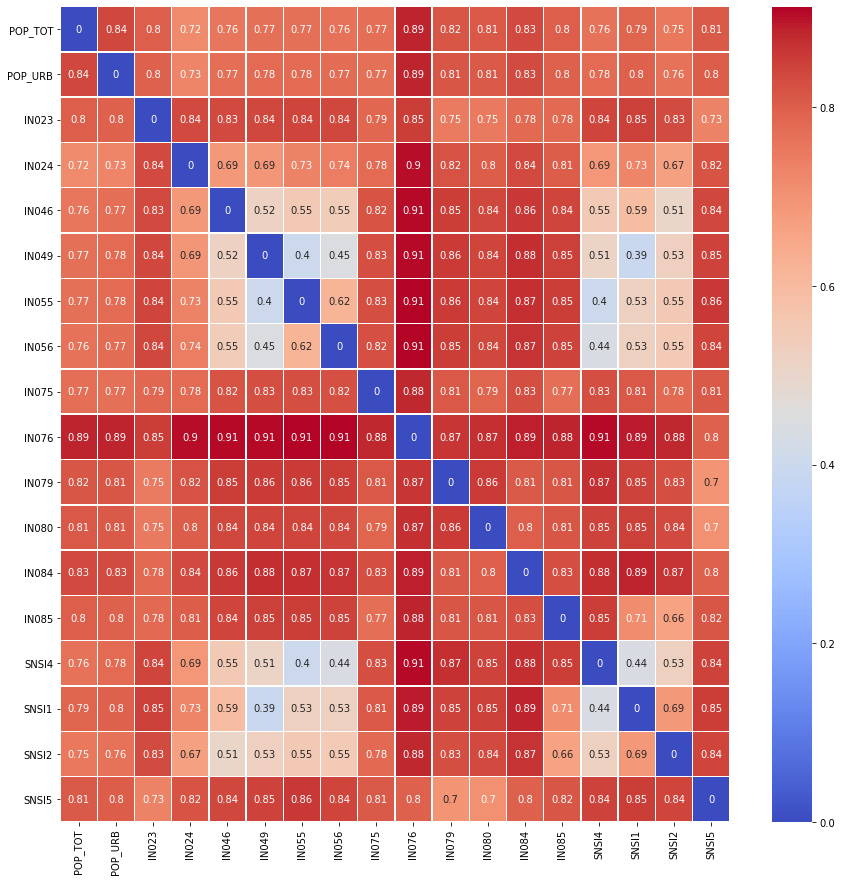

In [7]:
targets = ['POP_TOT', 'POP_URB', 'IN023', 'IN024',
       'IN046', 'IN049', 'IN055', 'IN056', 'IN075', 'IN076', 'IN079', 'IN080',
        'IN084', 'IN085', 'SNSI4', 'SNSI1', 'SNSI2', 'SNSI5']

comb = list(combinations(targets,2))
comb = [list(elem) for elem in comb]

matrix = pd.DataFrame(columns=targets , index=targets)

for elem in comb:
    clus = cluster(d17,elem ,2)
    matrix.at[elem[0],elem[1]] = clus[1]
    matrix.at[elem[1],elem[0]] = clus[1]
    matrix.at[elem[0],elem[0]] = 0
    
matrix.at['SNSI5','SNSI5'] = 0
matrix = matrix.infer_objects()
fig, ax = plt.subplots(1,figsize=(15,15))
fig = sns.heatmap(matrix,cmap='coolwarm',annot=True,linewidths=0.5 ).get_figure()
fig.savefig('sil_test.png' , dpi=300)

Análises Individuais<a name="análise_indiv"></a> 
================

## Agrupamento: IN055 e IN056 - Ano 2017<a name="in055_in056"></a> 

#### Índices de Avaliação do Agrupamento

In [8]:
feats = ['IN055','IN056']

result1 = cluster(d17, feats , 2)
print('Indice de silhueta: {}'.format(result1[1]))
print('Indice de Davies Bouldin: {}'.format(result1[2]))

Indice de silhueta: 0.6194870380433466
Indice de Davies Bouldin: 0.6368120749120906


<div style="text-align: justify">
&nbsp;&nbsp; Nesse caso os índices são mais confiáveis, apesar de ainda não ser um agrupamento forte.
</div>

In [9]:
df_clus = result1[0]
df_clus.groupby('labels').describe()[feats]

IN055                                                              \
        count       mean        std    min     25%     50%     75%    max   
labels                                                                      
0       155.0  72.696581  11.684978  47.79  64.355  73.140   78.77  100.0   
1       436.0  94.342867   6.101826  65.88  90.190  96.225  100.00  100.0   

        IN056                                                                
        count       mean        std    min     25%     50%      75%     max  
labels                                                                       
0       155.0  55.756839  14.458435  20.83  46.200  57.630  67.7250   82.74  
1       436.0  91.180275   8.254884  58.02  85.955  92.915  98.7075  100.00

<div style="text-align: justify">
&nbsp;&nbsp; É importante ressaltar que nesse agrupamento, a quantidade de municipios em cada grupo variou muito (grupo 0 = 448 elementos e grupo 1 = 155). Isso se dá porque boa parte dos municipios tem o seu nível de atendimento à água (IN055) ou esgoto (IN056) próximo de 80 - 100%, mas uma pequena quantidade de municipios tem uma quantidade bem menor do que a média, dessa forma distorcendo um pouco o agrupamento. Vale apontar quais são esses municípios.
</div>

In [10]:
d17[d17.IN056 < 20]

,municipio,Estado,ano,Código do Prestador,Prestador,Sigla do Prestador,Abrangência,Tipo de serviço,Natureza jurídica,POP_TOT,POP_URB,AG006,AG011,AG018,AG021,ES009,FN006,FN033,FN048,FN058,IN023,IN024,IN046,IN049,IN055,IN056,IN075,IN076,IN079,IN080,IN084,IN085,SNSI4,SNSI1,SNSI2,SNSI5,cod_ibge,TCE01,TCE02,TCE05,TCE06,TCE07,TCE08,TCE09,TCE11,TCE12,TCE13,TCE14,TCE15,TCE16,TCE17,TCE18,TCE19,TCE20,TCE21,TCE22,TCE23,TCE24,TCE25,TCE26,TCE28,TCE29
56,Barra do Chapéu,SP,2017,35503000,Companhia de Saneamento Básico do Estado de Sã...,SABESP,Regional,Água e Esgoto,Sociedade de economia mista com administração ...,5653,1664,182.28,150.58,0.0,1177.0,574.0,689557.86,517293.18,0.0,0.0,100.00,63.82,47.79,38.62,38.19,18.79,0.81,4.88,102.50,102.50,0.81,102.50,0.173908,0.007813,0.015477,-2.510914,3505351,0,NaN,1,0 |#| plano,"4,7","0,9",0,contrato de programa,45.0,0,0,NaN,0,NaN,0,NaN,0,NaN,0,Companhia de Saneamento e Abastecimento do Est...,contrato de Programa,45.0,1,0,1
214,Ibiúna,SP,2017,35503000,Companhia de Saneamento Básico do Estado de Sã...,SABESP,Regional,Água e Esgoto,Sociedade de economia mista com administração ...,77566,27156,3701.43,2460.16,0.0,15288.0,5926.0,11699719.07,2298185.90,0.0,0.0,100.00,50.12,36.28,45.62,44.94,17.55,0.00,0.00,101.94,101.55,0.57,101.55,0.335349,0.021625,0.008829,-0.230767,3519709,1,"43,7",1,lei municipal |#| 1819/2012,"5,2","4,9",0,CONTRATO,30.0,Parcialmente,1,Realização de educação ambiental para sensibil...,0,NaN,0,NaN,0,NaN,0,SABESP,"CONTRATO DE PROGRAMA, LEI",30.0,1,0,1
272,Jarinu,SP,2017,35503000,Companhia de Saneamento Básico do Estado de Sã...,SABESP,Regional,Água e Esgoto,Sociedade de economia mista com administração ...,28540,22056,1770.33,1435.51,0.0,9223.0,2397.0,6145650.85,12875923.15,0.0,0.0,83.72,19.90,31.11,35.11,64.70,15.38,0.24,0.73,104.04,104.29,0.00,103.28,0.189129,0.073125,0.004153,0.004288,3525201,1,85,1,Lei |#| 2024/16,3,"3,4",0,Contrato de concessão,20.0,Parcialmente,0,NaN,0,NaN,0,NaN,0,NaN,0,SABESP,Contrato de concessão,20.0,1,0,1
282,Juquitiba,SP,2017,35503000,Companhia de Saneamento Básico do Estado de Sã...,SABESP,Regional,Água e Esgoto,Sociedade de economia mista com administração ...,31027,24012,1507.81,1142.29,0.0,7297.0,2339.0,5579950.21,2192530.19,0.0,0.0,57.08,18.07,35.89,35.90,44.17,13.99,0.00,1.95,106.71,106.71,0.00,106.71,0.242418,0.027006,0.005670,-0.225883,3526209,1,3,0,NaN,"3,2","3,1",0,Não á contrato formalizado,0.0,"Sim, para todos os órgãos e entidades",0,NaN,1,Ações em conjunto com a Sabesp.,1,Ações em conjunto com a Sabesp.,0,NaN,0,Sabesp,"O Serviço é feito pela SABESP , porem não á co...",0.0,1,1,1
345,Nazaré Paulista,SP,2017,35503000,Companhia de Saneamento Básico do Estado de Sã...,SABESP,Regional,Água e Esgoto,Sociedade de economia mista com administração ...,18121,15358,740.73,686.71,0.0,4373.0,1505.0,2875292.10,1372515.61,0.0,0.0,46.39,15.04,24.74,26.93,39.31,12.75,0.00,0.24,145.83,145.83,0.96,144.10,0.072928,0.018321,0.003580,0.180729,3532405,1,50,1,"LEI |#| 1220, de 29/04/2016",3,3,0,Contrato é de responsabilidade da Sabesp,0.0,0,0,NaN,0,NaN,1,A SABESP tem atendido conforme necessidade,0,NaN,0,SABESP,contrato,0.0,1,0,0
442,Quadra,SP,2017,35503000,Companhia de Saneamento Básico do Estado de Sã...,SABESP,Regional,Água e Esgoto,Sociedade de economia mista com administração ...,3680,942,136.97,126.83,0.0,812.0,481.0,614689.38,41245.71,0.0,0.0,100.00,71.34,67.12,25.41,32.12,18.26,0.00,0.00,100.00,100.00,0.83,100.00,0.074031,0.019428,0.007833,0.275272,3541653,1,100,1,Lei |#| 525/2014,"6,6","6,6",0,CONTRATO,30.0,"Sim, para todos os órgãos e entidades",1,Setenta por cento (70%) da população de Quadra...,0,NaN,0,NaN,0,NaN,0,È executada pela SABESP.,Contrato,30.0,1,0,1


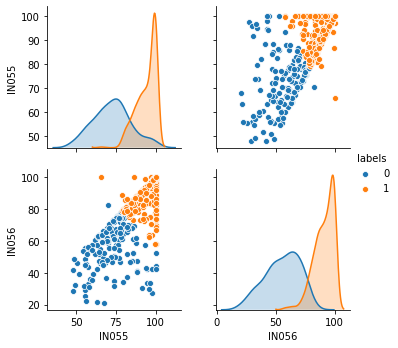

In [11]:
sns.pairplot(df_clus,hue='labels',vars=feats)

  <div style="text-align: justify">
&nbsp;&nbsp;Desses dados podemos obter duas hipóteses:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;1) A necessidade ampliação de acesso à esgoto acompanha o acesso à água. Ou seja, uma vez que se estabelece o acesso a água, há a necessidade de estabelecimento de acesso à esgoto. É possível vislumbrar nos gráficos de distribuição de IN055 e IN056. No gráfico de IN055 (Índice de Atendimento Total de Água), há uma maior intersecção entre os grupos, apesar do grupo zero ter uma quatindade maior de elementos próximos a 100%, o grupo um tambéms tem uma quatidade considerável de municipios nessa margem. Contudo, em IN056 (Índice de atendimento total de esgoto referido aos municípios atendidos com água), o grupo 1 possui uma quantidade bem mais significativa de elementos abaixo de 50% de acesso, inclusive o seu número máximo não chega a 100%. Para confirmar essa hipótese é necessário listar a cronologia das legislações locais de água e saneamento básico para verificar a sua sequência.<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;2) Outra hipótese que pode justificar a esse agrupamento de municipios com níveis acesso à água e ao esgoto altos em contraste com municipios com ambos os índices baixos, é a janela de oportunidade das políticas públicas. A questão do acesso à água, em grande medida, é alocada em conjunto com o saneamento básico, fazendo com que no momento que um desses temas ganha espaço na agenda municipal, o outro é elencado logo em seguida. <br> <br>
&nbsp;&nbsp;É possível verificar, também, ambas as possíveis hipóteses nos gráficos abaixo da evolução histórica da média de todos os municipios de IN055 e IN056. A evolução mostra que há um acompanhamento, mas ao mesmo tempo um leve descompasso.

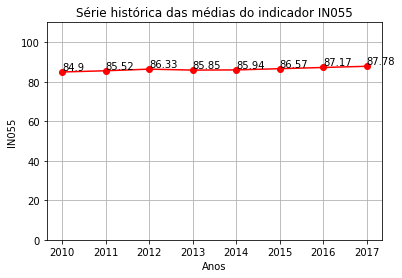

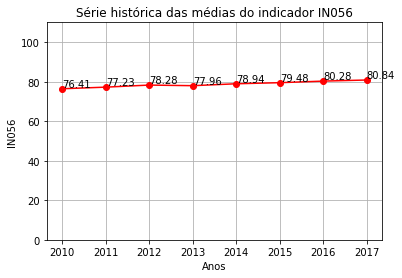

In [12]:
fig = get_mean_history('IN055')
fig = get_mean_history('IN056')

&nbsp;&nbsp;Seria necessário pesquisar a legislação local sobre os temas para validar uma ou outra hipótese.</div>

## Agrupamento: SNSI1 e SNSI2 - Ano 2017<a name="snsi1_snsi2"></a>  

#### Índices de Avaliação do Agrupamento

<div style="text-align: justify">
&nbsp;&nbsp; Ainda com relação às hipóteses apresentadas acima, temos outros dados que determinam o acesso da população à água e esgoto: SNSI1 e SNSI2. Ambas as variáveis medem as novas ligações, nesse caso, entre 2016 e 2017, nos permitindo observar o esforço feito no sentido da universalização desses dois serviços. Vale ressaltar mais uma vez que esses índices tiveram alguns estranhos pois em algumas cidades aprece a redução de ligações.
</div>

In [13]:
feats = ['SNSI1','SNSI2']

result2 = cluster(d17, feats , 2)
print('Indice de silhueta: {}'.format(result2[1]))
print('Indice de Davies Bouldin: {}'.format(result2[2]))

Indice de silhueta: 0.6874964631943212
Indice de Davies Bouldin: 0.47765891866227567


<div style="text-align: justify">
&nbsp;&nbsp; Segundo os índices de avaliação, o agrupamento parece relativamente relevante, apesar de não haver resultados fortes.
</div>

In [14]:
df_clus = result2[0]
df_clus.groupby('labels').describe()[feats]

SNSI1                                                              \
        count      mean       std       min       25%       50%       75%   
labels                                                                      
0       444.0  0.217052  0.271095 -0.520802  0.043003  0.106598  0.274552   
1       145.0  0.887858  0.202413  0.053990  0.866975  1.000000  1.000000   

                  SNSI2                                                    \
             max  count      mean       std       min       25%       50%   
labels                                                                      
0       1.005512  444.0  0.103835  0.132679 -0.988774  0.028561  0.069381   
1       1.001007  145.0  0.804587  0.215247  0.324904  0.624612  0.898370   

                            
             75%       max  
labels                      
0       0.160761  0.469070  
1       1.000000  1.205364

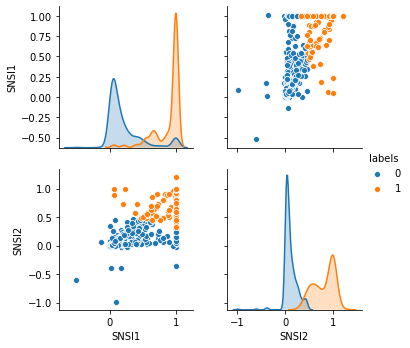

In [15]:
sns.pairplot(df_clus,hue='labels',vars=feats)

<div style="text-align: justify">
&nbsp;&nbsp; O agrupamento tem elementos bastante distintos entre o grupo 0 e 1 na variável SNSI1: O grupo 0, tende à zero, e assim, tem um menor número de ligações em comparação ao grupo 1 que tem uma grande parte de seus elementos perto de 1. Em contraste a isso, os dados de SNSI2 se sobrepõe quase a totalidade, à exceção de um/alguns outliers no grupo 0. <br> <br>
&nbsp;&nbsp;Portanto, talvez seja possível discutir se a segunda hipótese discutida na seção anterior tem validade. Pois se o esforço de ampliação do acesso à saneamento básico caminha lado a lado com o acesso à água, apresenta-se uma diferença bem contundente entre as características da cada cluster referente ao SNSI2. <br> <br>
&nbsp;&nbsp;Ao mesmo tempo, é possível também averiguar que talvez a hipótese 1 esteja correta, pois, novamente, no gráfico referente ao esforço de universalização do acesso à água, há alguns elementos do grupo 0 com SNSI = 1. Entretanto, o grupo 0  não tem nenhum elemento próximo ao topo da escala de SNSI2. Dessa forma, há um leve descompasso entre SNSI1 e SNSI2. <br> <br>
&nbsp;&nbsp; Pesquisas futuras nesse campo, além de confirmar as hipóteses, ajudariam na formulação de políticas públicas pensando no seu ciclo de implementação, seja ele sequencial ou concomitante.
</div>

## Correlação: Planejamento <a name="plan"></a> 
<br>  
<div style="text-align: justify">
&nbsp;&nbsp; Ainda no contexto da universalização do acesso à água e ao esgoto, uma série de perguntas do IEGM/TCESP diz respeito ao planejamento municipal sobre esses assuntos. Nesta seção, iremos testar a correlação entre essas perguntas (TCE05, TCE14 e TCE20) e os índices de acessibilidade (IN055, IN056, IN023 e IN024).
</div>

In [16]:
#Correlação do TCE05 - O município possui seu Plano Municipal de Saneamento Básico instituído?
#Dados relacionados à água
print(stats.pointbiserialr(d17.TCE05 , d17.IN055)[0])
print(stats.pointbiserialr(d17.TCE05 , d17.IN023)[0])

#Dados relacionados à esgoto
print(stats.pointbiserialr(d17.TCE05 , d17.IN056)[0])
print(stats.pointbiserialr(d17.TCE05 , d17.IN024)[0])

0.08438694917771787
0.002079558128318066
0.03773377779618713
-0.0393519101981713


In [17]:
#Correlação do TCE14 - Existem ações e medidas de contingenciamento para os períodos de estiagem?
print(stats.pointbiserialr(d17.TCE14 , d17.IN055)[0])
print(stats.pointbiserialr(d17.TCE14 , d17.IN023)[0])

0.14675193862600505
0.06384217976293063


In [18]:
# Correlação do TCE20 - Há um plano emergencial com ações para fornecimento de água potável à população em caso de sua escassez?
print(stats.pointbiserialr(d17.TCE20 , d17.IN055)[0])
print(stats.pointbiserialr(d17.TCE20 , d17.IN023)[0])

0.13033421533959588
0.02361341200622247


 <div style="text-align: justify">
&nbsp;&nbsp; Como todos as correlações resultaram em um coeficiente próximo a 0, não há evidências que haja uma correlação entre quaisquer plano e o índice de acesso da população à saneamento básico. Para complementar e afirmar ou não essa ideia, cabe pesquisar a fundo o cumprimento desses planos e como é feita a sua formulação
</div>

## Agrupamento: IN049 e SNSI4 - Ano 2017<a name="in049_snsi4"></a> 


#### Índices de Avaliação do Agrupamento

In [19]:
feats = ['IN049','SNSI4']

result3 = cluster(d17, feats , 2)
print('Indice de silhueta: {}'.format(result3[1]))
print('Indice de Davies Bouldin: {}'.format(result3[2]))

Indice de silhueta: 0.51154090229293
Indice de Davies Bouldin: 0.7012618850488008


 <div style="text-align: justify">
&nbsp;&nbsp; Percebe-se que, de fato, os índices de avaliação demonstram que esse agrupamento não está ideal, dado que o índice de silhueta está a 0.497 e o Davies Bouldin, 0.743. Entretanto, olhamos os gráficos de distribuição, os dados descritivos de cada grupo e consideramos que é uma separação com potencial de extração de informação.

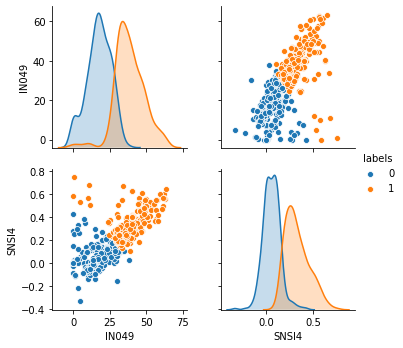

In [20]:
df_clus = result3[0]
#Gráficos demonstrando o agrupamento apresentado
sns.pairplot(df_clus,hue='labels',vars=feats)

In [21]:
df_clus.groupby('labels').describe()[feats]

IN049                                                             \
        count       mean       std  min      25%     50%      75%    max   
labels                                                                     
0       338.0  17.769201  8.088506  0.0  13.2775  18.185  23.6925  38.08   
1       254.0  38.655630  9.915246  0.0  32.4500  37.915  45.1875  63.52   

        SNSI4                                                              \
        count      mean       std       min       25%       50%       75%   
labels                                                                      
0       338.0  0.062404  0.089806 -0.326279  0.003723  0.062343  0.118822   
1       254.0  0.332093  0.124827  0.107159  0.237068  0.304968  0.406560   

                  
             max  
labels            
0       0.428469  
1       0.749888

 <div style="text-align: justify">
&nbsp;&nbsp; Forma-se, então, dois grupos distintos os quais o grupo 0 - com 338 municipios - tem um menor volume de água não faturado (média = 0,0624) e uma perda média de 17,76% de água durante a distribuição. Em contraste, o grupo 1 - com 254 municipios - tem um volume maior de água não faturada em conjunto com uma perda média de 38,65% da distribuição. <br>
&nbsp;&nbsp; Portanto, uma hipótese é que parte da água não faturada seja a água perdida durante a distribuição, perdendo a lucrabilidade do prestador de serviço. Outro método de avaliação dessa hipótese é pela correlação abaixo:
</div>

In [22]:
d17['IN049'].corr(d17['SNSI4'])

0.6345651002904811

<div style="text-align: justify">
&nbsp;&nbsp; A correlação está mininamente positiva, apesar de não muito sólida, indicando que talvez essa hipótese seja verdadeira. <br> 
&nbsp;&nbsp;Disso deduzimos algumas questões: Quais as causas da perda de eficiência do faturamento da água? Por que algumas cidades tem maior perda durante a distribuição? Podemos elucidar essas questões percebendo que há uma certa uniformidade geográfica no mapa abaixo, entretanto são necessárias pesquisas posteriores que avancem nesse tópico.
</div> 

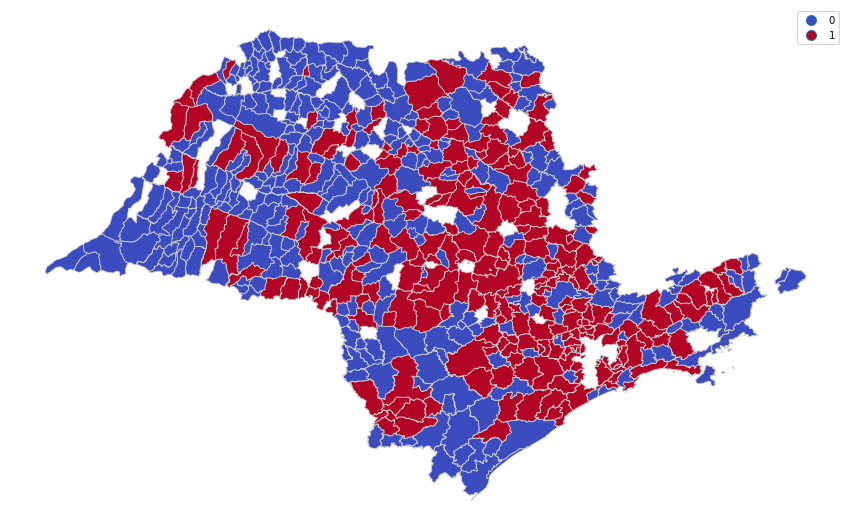

In [23]:
fig = plot_qualitative(df_clus, map_df , 'labels')
fig.show()

## Agrupamento Índices de qualidade<a name="qd"></a>  <br>
   <div style="text-align: justify">
&nbsp;&nbsp; Visto que os dados de qualidade se complementam, decidimos por agrupar a partir deles: 
</div>

In [24]:
feats = ['IN075','IN076','IN084']
result4 = cluster(df, feats , 2)

print('Indice de silhueta: {}'.format(result4[1]))
print('Indice de Davies Bouldin: {}'.format(result4[2]))

Indice de silhueta: 0.7945139377178825
Indice de Davies Bouldin: 0.7032468104850467


 <div style="text-align: justify">
&nbsp;&nbsp; Nesse caso, houve um índice silhoutte significativo e o Davies Bouldin parcialmente significativo. Entretanto, analisando o número de elementos dos grupos verificamos que:
</div>

In [25]:
df_clus = result4[0]
df_clus.groupby('labels').describe()[feats]

IN075                                                      IN076  \
         count      mean       std  min   25%   50%    75%    max   count   
labels                                                                      
0       4495.0  0.886890  2.106696  0.0  0.00  0.00  0.810  19.38  4495.0   
1        203.0  2.619951  3.950373  0.0  0.18  0.94  2.945  18.75   203.0   

                                                              IN084            \
            mean       std   min    25%   50%    75%    max   count      mean   
labels                                                                          
0       0.348251  0.717299  0.00  0.000  0.00  0.380   4.58  4495.0  0.523226   
1       8.405271  4.405769  3.86  5.075  6.85  9.895  22.32   203.0  1.912069   

                                                
             std  min  25%   50%    75%    max  
labels                                          
0       1.165174  0.0  0.0  0.00  0.640  14.29  
1       2.753769  0.0  0.0  0.54  2.925  16.67

  <div style="text-align: justify">
&nbsp;&nbsp; Percebe-se que há uma distorção absurda nos agrupamentos: grupo 0 tem 44095 respostas (ao longo dos 4 anos) e o grupo 0 apenas 203. Isso se dá porque há alguns outliers com respostas  bem distantes da média.
</div>

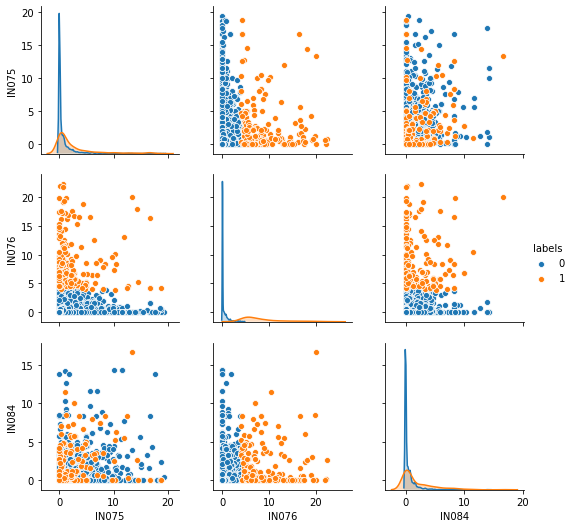

In [26]:
sns.pairplot(df_clus,hue='labels',vars=feats)

  <div style="text-align: justify">
&nbsp;&nbsp; Os gráfico aponta como algus pequenos pontos do grupo 1 tem uma realidade completamente diferente da média. Isso significa dizer que alguns prestadores de serviços, em suas análises, obtiveram 100% de presença de coliformes fora do padrão. <br><br>
&nbsp;&nbsp; Nesse caso, há a possibilidade dessas cidades terem sérios problemas de qualidade dos recursos hídricos ou as respostas dos prestadores de serviços foi equivocada. <br> <br>
&nbsp;&nbsp; Ressalto também o exemplo da cidade de Guaimbê, que faz parte do grupo 1. Abaixo temos a evolução histórica de cada um dos indicadores analisados. Nos casos dos índices IN084 (Incidência das análises de coliformes totais fora do padrão) e IN076(Incidência das análises de turbidez fora do padrão), houve uma queda brusca entre 2012 e 2013, de 100% para quase 0%. Apesar de poder ter havido uma mudança de gestão e uma renovação da qualidade da água, é mais provável que tenha tido um erro nas respostas de 2012 e 2013.<br>
</div>

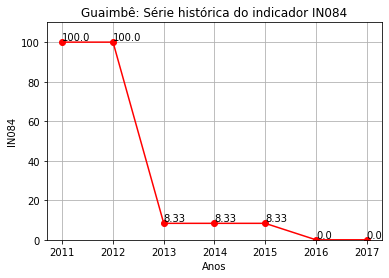

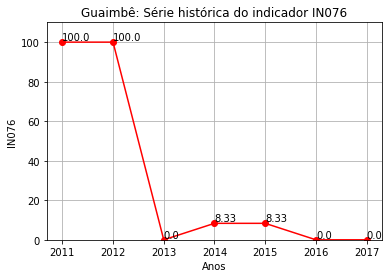

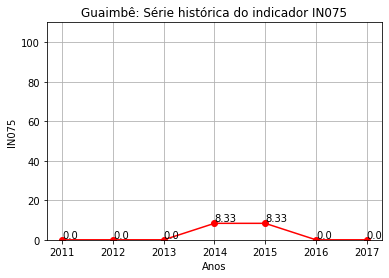

In [27]:
fig = get_history('Guaimbê','IN084')
fig = get_history('Guaimbê','IN076')
fig = get_history('Guaimbê','IN075')

  <div style="text-align: justify">
&nbsp;&nbsp; Além disso, o mapa abaixo demonstra a relação dos municipios,em 2017, com uma performance ruim nos indicadores apresentados. Dessa forma, constata-se que a questão de qualidade da água não é regionalizada em mananciais específicos, pois percorre localidades distantes entre si.<br> <br>
&nbsp;&nbsp;É necessário refazer os testes nas águas dos municipios do grupo 1 para atestar a qualidade.   
</div>

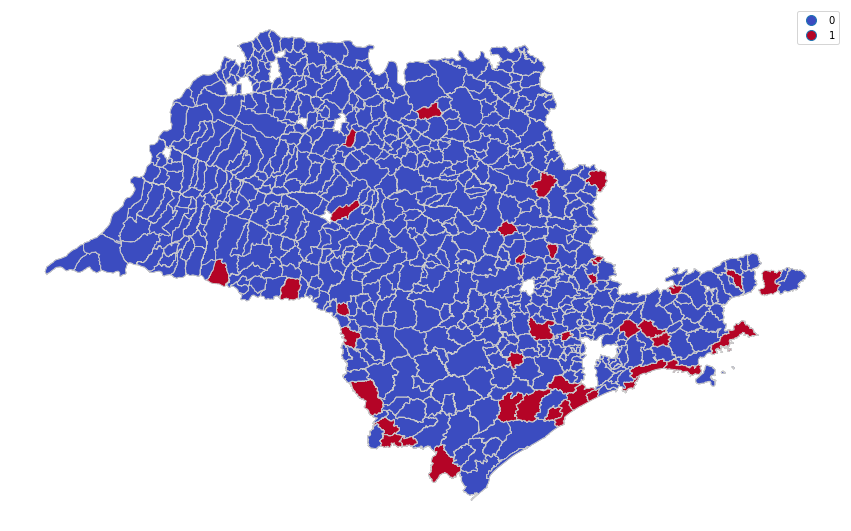

In [28]:
fig = plot_qualitative(df_clus, map_df , 'labels')
fig.show()

API
===
<a name="api"></a> 
  <div style="text-align: justify">
&nbsp;&nbsp;Para disponibilização destas análises, foi criada uma API em flask, essa API possui acesso às bases de dados construídas a partir da união entre a fornecida pelo TCESP e a obtida pelo SNIS, neste *notebook* isso se refere ás váriaveis df, d14, d15, d16, e d17. A principal função da API é a realização de agrupamentos *on demand*, podendo retornar suas estatísticas principais, gráficos de distribuição e um mapa colorido com as classes encontradas. Como funções secundárias a API permite realizar buscas sobre dados dentro de suas bases, plotar gráficos de tendências históricas (iniciando em 2010 e terminando em 2017) e criar mapas colorindo os com variáveis de interesse. Todos os dados não gráficos são devolvidos em formato json.
</div>
### Utilização da API: rotas disponíveis

- **/api/v1/municipio/data** : retorna um dado requisitado baseado nos argumentos de ano, município e indicador, ex: /api/v1/municipio/data?mun=Nazaré+Paulista&ano=2017&col=IN055
- **/api/v1/municipio/hist**: retorna o gráfico de evolução histórica do indicador desejado, recebendo como argumentos o município e o indicador de interesse, ex: /api/v1/municipio/hist?mun=Adamantina&col=IN056
- **/api/v1/estado/hist** : retorna o gráfico de evolução histórica da média do Estado inteiro para um indicador, ex: /api/v1/estado/hist?col=IN075
- **/api/v1/estado/map/quali** : retorna um mapa colorido com base na variável **qualitativa** requsitada, recebendo como argumento o ano desejado e o indicador de interesse, ex: /api/v1/estado/map/quali?ano=2016&col=TCE16
- **/api/v1/estado/map/quant** : realiza a mesma função da rota passada, mas para variáveis **quantitativas**, ex: /api/v1/estado/map/quant?ano=2017&col=IN049
- **/api/v1/cluster**: realiza um agrupamento utilizando as variáveis fornecidas e retorna um conjunto de estatísticas para avaliação da qualidade do agrupamento, recebe como parâmetros os indicadores desejados, o número de grupos a se formar e o ano de interesse, ex: /api/v1/cluster?cols=IN055+IN056+IN075&ano=2017&n=2
- **/api/v1/cluster/plots** : realiza um agrupamento e retorna os gráficos de dispersão e distribuição associados, seus parâmetros são os mesmos que /api/v1/cluster, assim como a estrutura da *query* em URL.
- **/api/v1/cluster/map** : realiza um agrupamento e retorna um mapa do Estado de São Paulo colorido com os grupos encontrados, recebe os mesmos parâmetros que os dois últimos, assim como possui a estrutura da *query* em URL.



Bibliografia<a name="bibliografia"></a> 
==========
BRASIL, Ministério do Desenvolvimento Regional. **Sistema Nacional de Informações sobre Saneamento**. Disponível em \<http://snis.gov.br/ >. Acessado em 15 de outubro de 2019. <br> <br> 
BRASIL, Ministério do Desenvolvimento Regional. **Glossário de Informações de Água e Esgotos**, 2019a. Disponível em \<http://snis.gov.br/glossarios>. Acessado em 15 de outubro de 2019.<br> <br> 
BRASIL, Ministério do Desenvolvimento Regional. **Glossário de Índices de Água e Esgotos**, 2019b. Disponível em \<http://snis.gov.br/glossarios>. Acessado em 15 de outubro de 2019.<br> <br> 
INSTITUTO TRATA BRASIL. **Ranking do Saneamento**, 2019. Disponível em \<http://www.tratabrasil.org.br/images/estudos/itb/ranking-2019/Relat%C3%B3rio_-_Ranking_Trata_Brasil_2019_v11_NOVO_1.pdf>. Acessado em 15 de outubro de 2019. <br> <br>
Rousseeuw, P.J., 1987. Silhouettes: a graphical aid to the interpretation and validation of cluster analysis. Journal of computational and applied mathematics, 20, pp.53-65. Disponível em 
\<https://www.sciencedirect.com/science/article/pii/0377042787901257?via%3Dihub >. Acessado em 16 de outubro de 2019.